### Using Pandas in Jupyer Notebook

In [91]:
# Importing the pandas and os package

import pandas as pd 
import os
import matplotlib.pyplot as plt


In [ ]:
# Importing all csv files to create dataframes using your local datapath

# NOTE: Change the relative local path used to import the csvs to the ones on your local. Wherever the csvs are stored.
relative_local_path = 'D:\\ECS 166\\COMPANY-EXAMPLE\\'

department_df = pd.read_csv(f"{relative_local_path}department.csv")
dependent_df = pd.read_csv(f"{relative_local_path}dependent.csv")
dept_locations_df = pd.read_csv(f"{relative_local_path}dept_locations.csv")
employee_df = pd.read_csv(f"{relative_local_path}employee.csv")
project_df = pd.read_csv(f"{relative_local_path}project.csv")
works_on_df = pd.read_csv(f"{relative_local_path}works_on.csv")

<span style="color:gray; font-weight:bold;">Basic Operations</span> <br>
<span style="font-style:italic">Viewing and describing data are fundamental to understand the datasets you work with.
</span>

In [ ]:
# Sanity check to see if the import has worked
# .head() will give you the first 5 records of dependent_df

department_df.head()

In [ ]:
# Sanity check to see if the import has worked on employee_df

employee_df.head()

In [ ]:
# .describe() generates statistics for the df on department_df
# Includes count, mean, std. deviation, min, max, quartile percent

department_df.describe()

In [ ]:
# One more call using .describe() on employee_df

employee_df.describe()

In [ ]:
# .info() generates table data including datatypes, memory, number of entries (on department_df)

department_df.info()

In [ ]:
# One more call using .describe() on employee_df

employee_df.info()

<span style="color:gray; font-weight:bold;">Using Operators</span> <br>
<span style="font-style:italic">Operators can manipulate data directly. For example, we can add columns, perform arithmetic operations, or filter data based on conditions.</span>

In [ ]:
# Arithmetic Operations 
# Using the employee_df, increase the value of the salary column by 2 and display it 

employee_df['increase_salary'] = employee_df['salary'] * 2

print(employee_df[['fname', 'increase_salary']])

In [ ]:
# Conditional Operations
# Return all records with salary over 60k in employee_df

filtered_df = employee_df[employee_df['increase_salary'] > 60000]

print(filtered_df)

<span style="color:gray; font-weight:bold;">Error Handling</span> <br>
<span style="font-style:italic">To ensure that we handle erros when operations fail</span>

In [ ]:
# Use a try except block to handle errors 
# We will try creating a column increase_salary which includes product of the data of non existing column sal with 2

try:
    employee_df['increase_salary'] = employee_df['sal'] * 2

    print(employee_df[['fname', 'increase_salary']])
    
except KeyError as e:
    print(f"Error: One of the columns does not exist in the DataFrame. Missing column: {e}")
    
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    

<span style="color:gray; font-weight:bold;">Functions</span> <br>
<span style="font-style:italic">Pandas offers a variety of functions to efficiently manipulate and analyze data.
</span>

In [ ]:
# Applying a function to a column
# Return a new column salary_by_5 with salary multiplied by 5 in employee_df

employee_df['salary_by_5'] = employee_df['salary'].apply(lambda x: x * 5)

print(employee_df)

In [ ]:
# Return a new column female_employees stating which employees are female in employee_df

employee_df['female_employees'] = employee_df['gender'].apply(lambda x: x == 'F')

print(employee_df[['fname', 'female_employees', 'gender']])

In [ ]:
# Creating custom functions 
# Create a function to return all employees in a column increase_salary with salaries greater than 60k 
# or else change salary to 0 in employee_df

def change_salary(x):
    if(x > 25000):
        return x
    return 0

employee_df['increase_salary'] = employee_df['salary'].apply(change_salary)

print(employee_df)

<span style="color:gray; font-weight:bold;">Changing the Dataframe</span> <br>
<span style="font-style:italic">Manipulate the dataframe definition</span>

In [ ]:
# Remove the column female_employees from employee_df

employee_df = employee_df.drop('female_employees', axis=1)

print(employee_df)

In [ ]:
# In-place remove the column increase_salary from employee_df using .pop() and return a series 
# We can now perform operations on this column like it were a DS

increase_salary_col = employee_df.pop('increase_salary')

print(employee_df)

print(increase_salary_col)

In [ ]:
# Get mean of all values in increase_salary_col 

mean_value = increase_salary_col.mean()

print("Mean of the popped column:", mean_value)

In [ ]:
# Get the 5th value in increase_salary_col. Use a try and except block as well.

try:
    if len(increase_salary_col) >= 8:
        last_val = increase_salary_col[10]
        print('The last value is: ',last_val)
    else:
        print('Column does not have those many values')
except Exception as e:
     print(f"An unexpected error occurred: {e}")

In [ ]:
# Rename the column address to shipping_address in employee_df

employee_df.rename(columns={'address': 'shipping_address'}, inplace=True)

print(employee_df)

<span style="color:gray; font-weight:bold;">Using iloc</span> <br>
<span style="font-style:italic">Used for integer-location based indexing, meaning it allows you to access parts of the DataFrame or Series by using integer indices
</span>

In [ ]:
# Accessing the third record in the employee_df and store it in third_rec
# Returns a 1D series DS

third_rec = employee_df.iloc[2]

print(third_rec)

In [ ]:
# Return the first five employees in employee_df and store in first_five
# Returns 2D Series DS

first_five = employee_df.iloc[0:5]

print(first_five)

In [ ]:
# Print the value at the 8th location in third_rec

print(third_rec.iloc[7])

In [ ]:
# Add Values in the salary column for the first and last element in first_five

addition = first_five.iloc[0,7] + first_five.iloc[4,7]

print(addition)

In [ ]:
# What if I don't know the index of the salary column? Use columns.get_loc(columnName)

sal_loc = first_five.columns.get_loc('salary')

addition = first_five.iloc[0,sal_loc] + first_five.iloc[4,sal_loc]

print(addition)

<span style="color:gray; font-weight:bold;">Data Visualization</span> <br>
<span style="font-style:italic">Use matplotlib to visualize your data</span>

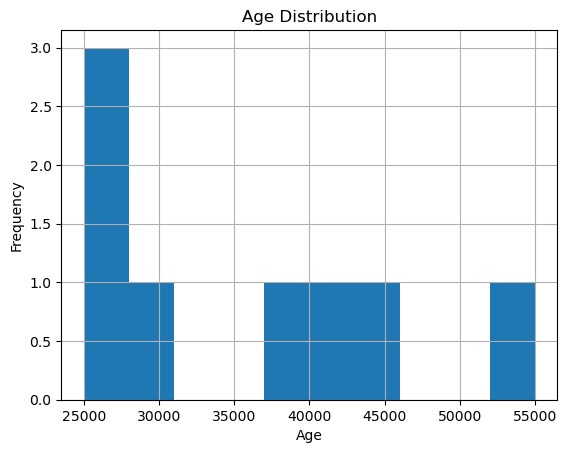

In [93]:
# Plot a histogram of the Salary column in employee_df

employee_df['salary'].hist(bins=10)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('No of Employees')
plt.show()

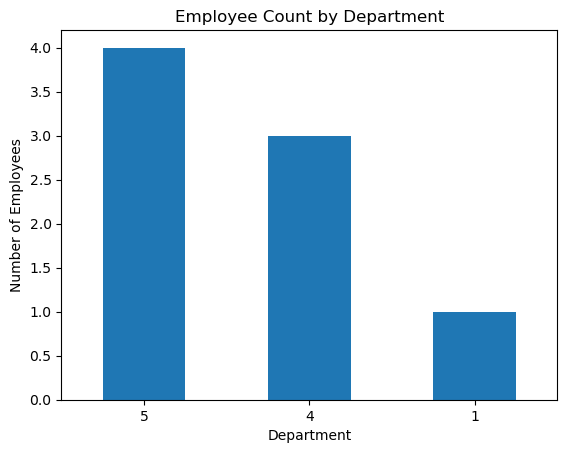

In [100]:
# Plot a bar graph showing number of employees in each department

# Count the number of employees in each department

department_counts = employee_df['dno'].value_counts()

# Plot a bar chart of the department counts

department_counts.plot(kind='bar')
plt.title('Employee Count by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=360)
plt.show()

<span style="color:gray; font-weight:bold;">Exporting your DataFrame</span>

In [ ]:
# Print the current working directory

print(os.getcwd())

In [ ]:
# Output it to any location on your local with the name disc-4-output.csv (Can have any name).

first_five.to_csv(f"{os.getcwd()}\disc-4-output.csv", index=False)

print('File has been exported')